In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.stats
from PIL import Image

rng = np.random.default_rng()

In [2]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = 'some_path'

print('The data directory is %s' % course_data_dir)

event_file_path = os.path.join(course_data_dir ,'events_US_air_traffic_GMT.txt')
airport_info_file_path = os.path.join(course_data_dir ,'US_airport_id_info.csv')
background_image_file_path = os.path.join(course_data_dir , 'US_air_bg.png')

events = pd.read_csv(event_file_path, delimiter=' ')
airport_info = pd.read_csv(airport_info_file_path, delimiter=',', index_col=0)

print('The data directory is {path}'.format(path=course_data_dir))
print('The event file is at {path}'.format(path=event_file_path))
print('The airport info file is at {path}'.format(path=airport_info_file_path))
print('The visualization background image is at {path}'.format(path=background_image_file_path))

The data directory is /coursedata
The data directory is /coursedata
The event file is at /coursedata/events_US_air_traffic_GMT.txt
The airport info file is at /coursedata/US_airport_id_info.csv
The visualization background image is at /coursedata/US_air_bg.png


In [3]:
display(events)

,Source,Destination,StartTime,EndTime,Duration
0,0,1,1229286900,1229291520,4620
1,0,1,1229272800,1229277300,4500
2,0,2,1229285640,1229291520,5880
3,0,3,1229268060,1229276040,7980
4,0,3,1229284740,1229293140,8400
...,...,...,...,...,...
180187,260,24,1230066420,1230070440,4020
180188,260,24,1230049200,1230052620,3420
180189,260,16,1230059400,1230064200,4800
180190,260,16,1230035400,1230040200,4800


## 1. Sorting

In [4]:
# Global sorting
ev_seq = events.sort_values(by=['StartTime'], ascending=True)

In [5]:
ev_seq.head()

,Source,Destination,StartTime,EndTime,Duration
16150,27,49,1229231100,1229246760,15660
16997,30,2,1229233200,1229245980,12780
14055,251,20,1229235000,1229246340,11340
9181,16,4,1229235300,1229250240,14940
9332,16,7,1229235300,1229245500,10200


## Airpor data -detail airport_info)

In [6]:
# adding Id to the dataframe
airp = airport_info.reset_index()

In [7]:
airp[airp.id == 27]

,id,symbol,airport name,city,latitude,longitude,xcoordviz,ycoordviz
27,27,SLC,Salt Lake City Intl,Salt Lake City,40.788389,-111.977772,-1.121073e+06,188655.57638


In [8]:
#########################
## Add column of 0s
#########################
ev_seq = events.sort_values(by=['StartTime'], ascending=True)
ev_seq['status_s'] = np.zeros(len(ev_seq))
ev_seq['status_d'] = np.zeros(len(ev_seq))

In [9]:
ev_seq.loc[ev_seq.index[0], 'status_s'] = 1

In [10]:
ev_seq.shape

(180192, 7)

In [11]:
ev_seq

,Source,Destination,StartTime,EndTime,Duration,status_s,status_d
16150,27,49,1229231100,1229246760,15660,1.0,0.0
16997,30,2,1229233200,1229245980,12780,0.0,0.0
14055,251,20,1229235000,1229246340,11340,0.0,0.0
9181,16,4,1229235300,1229250240,14940,0.0,0.0
9332,16,7,1229235300,1229245500,10200,0.0,0.0
...,...,...,...,...,...,...,...
170670,246,24,1230104700,1230125640,20940,0.0,0.0
168992,55,23,1230105000,1230124740,19740,0.0,0.0
168893,55,24,1230105300,1230127200,21900,0.0,0.0
174360,56,32,1230105420,1230123060,17640,0.0,0.0


## Seed node 27

In [12]:
seed_node = 27 # patient 0
first_circle = ev_seq[ev_seq["Source"] == seed_node]

In [13]:
first = first_circle.sort_values(by=['StartTime'], ascending=True)

<Axes: >

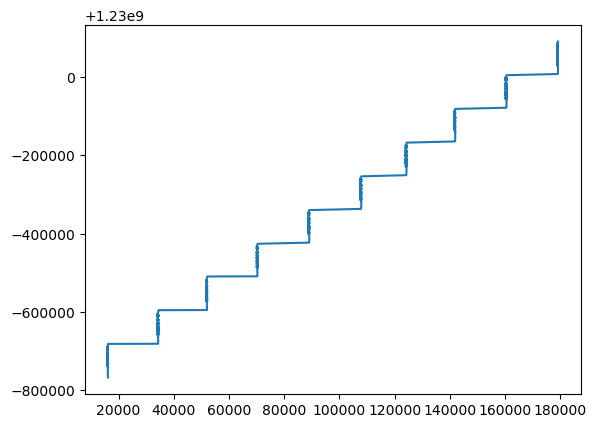

In [14]:
first['StartTime'].plot()

In [15]:
first_circle[['Duration']].equals(first_circle['Duration'].sort_values())

False

In [16]:
first = first.sort_values(by=['StartTime'], ascending=True)
display(first)

,Source,Destination,StartTime,EndTime,Duration,status_s,status_d
16150,27,49,1229231100,1229246760,15660,1.0,0.0
16113,27,12,1229252400,1229257620,5220,0.0,0.0
16110,27,16,1229252400,1229259660,7260,0.0,0.0
16223,27,7,1229253000,1229262900,9900,0.0,0.0
16156,27,4,1229254200,1229267400,13200,0.0,0.0
...,...,...,...,...,...,...,...
179157,27,177,1230085200,1230089700,4500,0.0,0.0
179106,27,25,1230085260,1230092340,7080,0.0,0.0
178842,27,22,1230085800,1230093300,7500,0.0,0.0
178852,27,24,1230086700,1230092700,6000,0.0,0.0


In [17]:
first['real_time'] = first["StartTime"] - first.iloc[0, 2]

In [18]:
first['real_end_time'] = first["real_time"] + first["Duration"]

<Axes: >

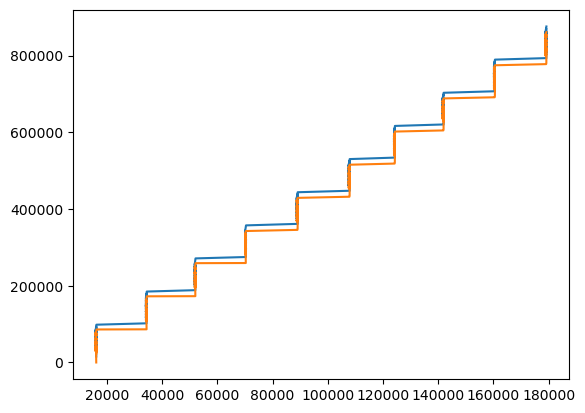

In [19]:
first["real_end_time"].plot()
first["real_time"].plot()

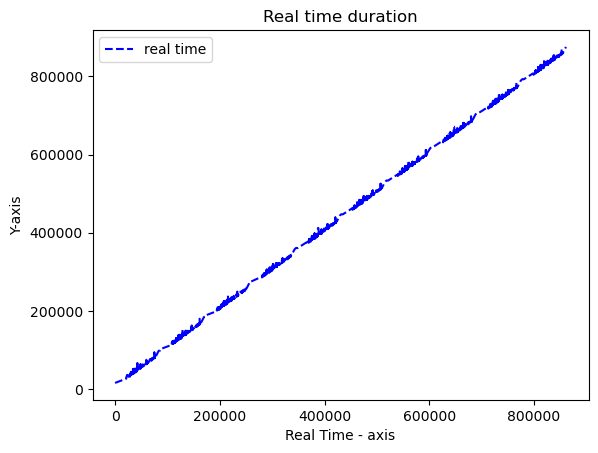

In [20]:
plt.plot(first['real_time'], first['real_end_time'], label='real time', color='blue', linestyle='--')
# Add labels and title
plt.xlabel('Real Time - axis')
plt.ylabel('Y-axis')
plt.title('Real time duration')
# Add a legend
plt.legend()
# Display the plot
plt.show()

## C- network

In [12]:
#ev_seq 

C = nx.from_pandas_edgelist(ev_seq,
                            'Source', 'Destination',
                            edge_attr=['Duration', 'StartTime'], create_using=nx.DiGraph())
'''
pos = nx.spring_layout(C)  # You can choose a different layout if needed
nx.draw(C, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(C, 'Duration')
nx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels)

# Display the plot
plt.show()
'''

"\npos = nx.spring_layout(C)  # You can choose a different layout if needed\nnx.draw(C, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')\n\n# Draw edge labels\nedge_labels = nx.get_edge_attributes(C, 'Duration')\nnx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels)\n\n# Display the plot\nplt.show()\n"

In [13]:
# Calculate the degree of each node
degrees = C.degree()

# Calculate the global degree by summing up all node degrees
global_degree = sum(dict(degrees).values())

print("Global Degree:", global_degree)

Global Degree: 8304


Node 27: [49, 12, 16, 7, 4, 31, 170, 24, 3, 5, 276, 241, 273, 26, 22, 34, 15, 88, 32, 25, 19, 38, 106, 8, 107, 184, 48, 179, 178, 28, 33, 109, 110, 223, 10, 20, 259, 29, 177, 30, 275, 175, 75, 186, 215, 204, 47, 207, 101, 1, 87, 50, 208, 263, 218, 183, 210, 195, 224, 194, 219, 220, 37, 272, 216, 211, 205, 23, 221, 214, 203, 55, 21, 116, 63, 187, 142, 95, 65, 81, 41, 60, 212, 56, 46, 213, 206]
Node 49: [80, 180, 83, 20, 4, 24, 32, 16, 27, 109, 95, 78, 3, 82, 15, 81, 85, 14, 46, 34, 64, 77, 86, 29, 12, 184, 94, 26, 110, 25, 48, 5, 1, 33, 170, 10, 114, 87, 72, 108, 22, 65, 2, 70, 96, 134, 28, 174, 45, 135, 50, 7, 107, 23, 31, 38, 251, 202, 103]
Node 30: [2, 7, 12, 32, 31, 16, 24, 8, 4, 3, 15, 27, 21, 25, 34, 26]
Node 2: [33, 31, 49, 50, 4, 105, 7, 3, 32, 26, 16, 24, 103, 20, 34, 10, 110, 80, 12, 83, 46, 15, 47, 5, 78, 95, 93, 85, 66, 65, 64, 94, 29, 81, 109, 25, 77, 163, 98, 61, 75, 148, 125, 72, 79, 1, 135, 92, 143, 82, 45, 19, 97, 70, 28, 0, 86, 104, 48, 90, 30, 108, 134, 127, 118, 264]

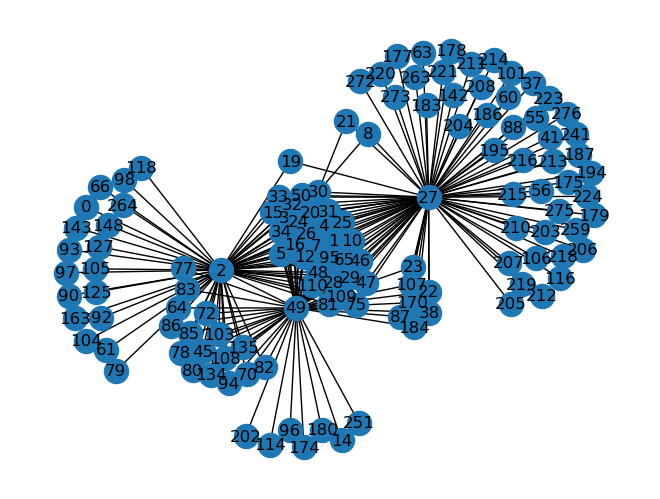

In [14]:
subnet = nx.Graph()

# Keep track of visited nodes to limit the loop to the first 4 iterations
visited_nodes = set()

# Print neighbors for each node and add them to the subnet
for node in C.nodes():
    if node not in visited_nodes:
        neighbors = list(C.neighbors(node))
        print(f"Node {node}: {neighbors}")

        # Add the current node and its neighbors to the subnet
        # Add the current node and its neighbors to the subnet
        subnet.add_node(node, weight=C.nodes[node].get('Duration', None), feature=C.nodes[node].get('StartTime', None))
        subnet.add_edges_from([(node, neighbor, {'Duration': C[node][neighbor].get('Duration', None), 'StartTime': C[node][neighbor].get('StartTime', None)}) for neighbor in neighbors])

        # Mark the current node as visited
        visited_nodes.add(node)

        # Check if we have collected information from 4 iterations
        if len(visited_nodes) == 4:
            break

# Visualize the subnet
# You can use networkx functions to visualize the subnet, such as nx.draw()
# For example:
import matplotlib.pyplot as plt

nx.draw(subnet, with_labels=True)

plt.show()

In [17]:
iter = 0
# Print neighbors for each node
for node in subnet.nodes():
    print("node number ", node)
    neighbors = list(subnet.neighbors(node))
    print(f"Node {node}: {neighbors}")
    iter += 1
    if iter == 4: break


node number  27
Node 27: [49, 12, 16, 7, 4, 31, 170, 24, 3, 5, 276, 241, 273, 26, 22, 34, 15, 88, 32, 25, 19, 38, 106, 8, 107, 184, 48, 179, 178, 28, 33, 109, 110, 223, 10, 20, 259, 29, 177, 30, 275, 175, 75, 186, 215, 204, 47, 207, 101, 1, 87, 50, 208, 263, 218, 183, 210, 195, 224, 194, 219, 220, 37, 272, 216, 211, 205, 23, 221, 214, 203, 55, 21, 116, 63, 187, 142, 95, 65, 81, 41, 60, 212, 56, 46, 213, 206]
node number  49
Node 49: [27, 80, 180, 83, 20, 4, 24, 32, 16, 109, 95, 78, 3, 82, 15, 81, 85, 14, 46, 34, 64, 77, 86, 29, 12, 184, 94, 26, 110, 25, 48, 5, 1, 33, 170, 10, 114, 87, 72, 108, 22, 65, 2, 70, 96, 134, 28, 174, 45, 135, 50, 7, 107, 23, 31, 38, 251, 202, 103]
node number  12
Node 12: [27, 49, 30, 2]
node number  16
Node 16: [27, 49, 30, 2]


In [30]:
G = subnet.copy()

In [32]:
def infection_matrix(net):
    
    num_nodes = len(net.nodes())
    infection_array = np.zeros((num_nodes, num_nodes), dtype=float)
                
    return infection_array


def update_time(times_matrix, seed_node):
    
    values = 0
    track = np.array([seed_node - 1])
    
    # What was the min value of the arrange greater than 0 (it-self)--> faster transmission
    indeces = np.where(times_matrix[(seed_node - 1), :] >= 1)
    values = times_matrix[(seed_node - 1), indeces]

    # Check if any new number is not in the existing array
    new_numbers = np.setdiff1d(indeces[0], track)
    track = np.concatenate((track, new_numbers))

    # Update the infection time
    for v, k in zip(values[0], track[1:]):
        
        update = times_matrix[k, :]
        update[update > 0] += v

        # Add the update
        times_matrix[k, :] = update

        # Update indeces and values for the next iteration
        indeces = np.where(times_matrix[k, :] >= 1)
        values = times_matrix[k, indeces]

        # Check if any new number is not in the existing array THE NODE == INDEX
        new_numbers = np.setdiff1d(indeces[0], track)
        #print("new_numbers ROW", new_numbers)

        if new_numbers.size > 0:
            v = times_matrix[k, new_numbers]

            update = times_matrix[new_numbers, :]
            update[update > 0] += v[0]
            # Add the update
            times_matrix[new_numbers, :] = update

            # Concatenate values and times_matrix[k, new_numbers]
            track = np.concatenate((track, new_numbers))

    return track  

def infection(f, track, prob_array, infect_array):
    p = f
    infection_row = np.where(prob_array[track[0], :] >= p, 1, 0)
    infect_array[track[0],:] = infection_row

    for i in infection_row[1:]: # 1, 0, 0, 0
        if i == 1:
            for j in track[1:]: # ..., 1, 1
                infect_row = np.where(prob_array[j, :] >= p, 1, 0)
                infect_array[j,:] = infect_row

                cols = np.where(infect_array[j,:] == 1)
                
                # Check if any new number is not in the existing array
                new_numbers = np.setdiff1d(cols, track)

                # Append the new numbers to the existing array
                track = np.append(track, new_numbers)
        else:
            pass

    return infect_array     


def update_time_prob(times_matrix, infection_matrix, seed_node):
    
    times_matrix = times_matrix * infection_matrix
    
    values = 0
    track = np.array([seed_node - 1])
    
    # What was the min value of the arrange greater than 0 (it-self)--> faster transmission
    indeces = np.where(times_matrix[(seed_node - 1), :] >= 1)
    values = times_matrix[(seed_node - 1), indeces]

    # Check if any new number is not in the existing array
    new_numbers = np.setdiff1d(indeces[0], track)
    track = np.concatenate((track, new_numbers))

    #print("GO INSIDE")
    # Update the infection time
    for v, k in zip(values[0], track[1:]):
        
        update = times_matrix[k, :]
        update[update > 0] += v

        # Add the update
        times_matrix[k, :] = update

        # Update indeces and values for the next iteration
        indeces = np.where(times_matrix[k, :] >= 1)
        values = times_matrix[k, indeces]

        # Check if any new number is not in the existing array THE NODE == INDEX
        new_numbers = np.setdiff1d(indeces[0], track)
        #print("new_numbers ROW", new_numbers)

        if new_numbers.size > 0:
            #print("value ", times_matrix[k, new_numbers])  # aca el Value
            v = times_matrix[k, new_numbers]

            update = times_matrix[new_numbers, :]
            update[update > 0] += v[0]
            # Add the update
            times_matrix[new_numbers, :] = update

            # Concatenate values and times_matrix[k, new_numbers]
            track = np.concatenate((track, new_numbers))
            
    accumulated_sums = {}

    # Initialize accumulated sum variable
    accumulated_sum = 0

    # Iterate through the shortest path lengths
    for node, distance in shortest_paths.items():
        # Add the distance to the accumulated sum
        accumulated_sum += distance

        # Store the accumulated sum in the dictionary
        accumulated_sums[node] = accumulated_sum
        
        
    return times_matrix, track, accumulated_sums    

def match_array_lengths(arr1, arr2):
    len1, len2 = len(arr1), len(arr2)

    if len1 != len2:
        # Resize arr2 to match the length of arr1
        arr2 = np.resize(arr2, len1)

    return arr1, arr2


In [34]:
weight_array = nx.adjacency_matrix(G, weight='weight').todense()
np.random.seed(41)
nod_numbers = len(G.nodes())
probabilities = np.round(np.random.rand(nod_numbers, nod_numbers), decimals=2)
prob_array = np.where(weight_array > 0, probabilities, 0)

seed_node = 27
times_matrix = nx.adjacency_matrix(G, weight='weight').todense()
shortest_paths = nx.shortest_path_length(G, source=seed_node, weight='weight')

infect_array = infection_matrix(G)
print(infect_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
Nodes = list(G.nodes())

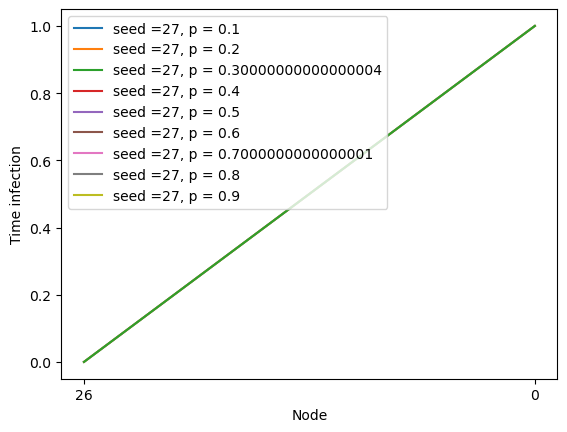

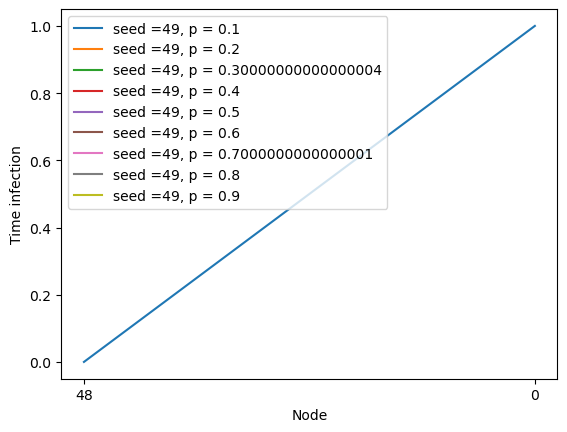

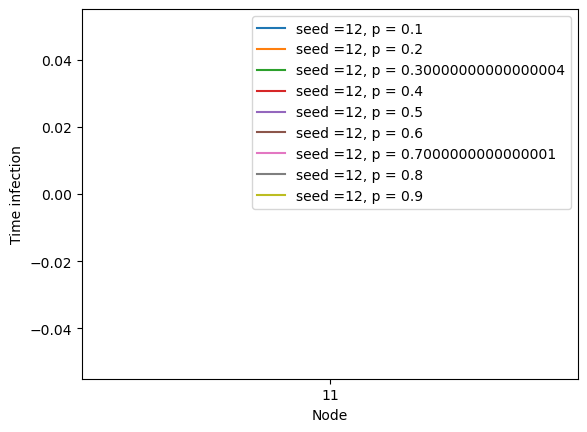

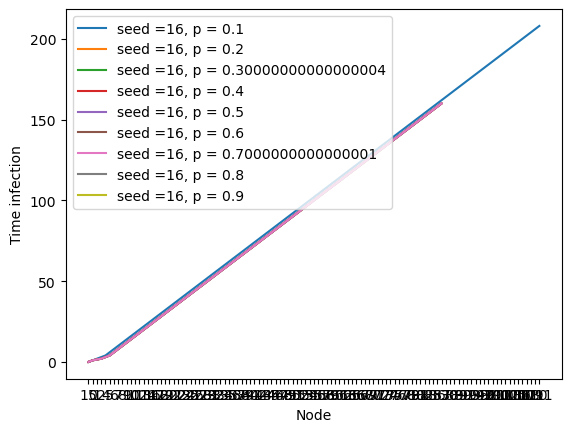

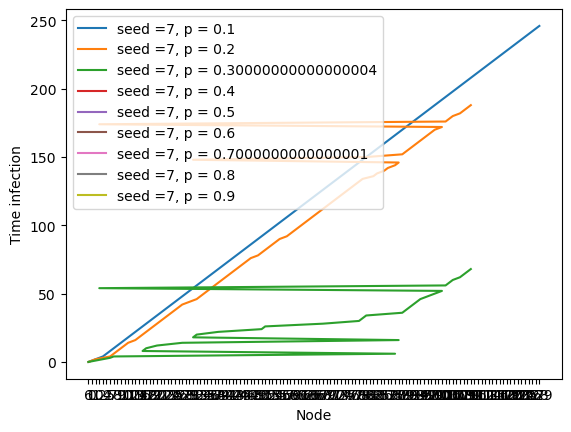

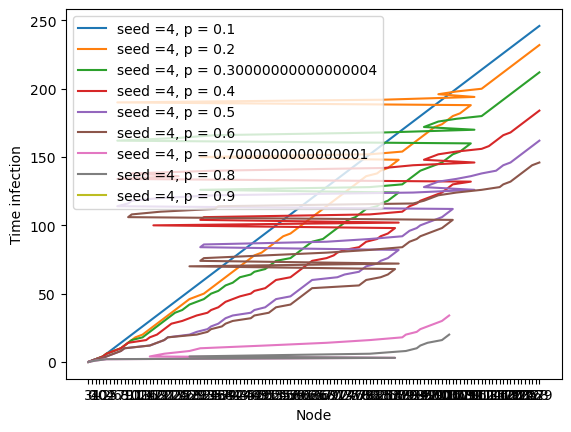

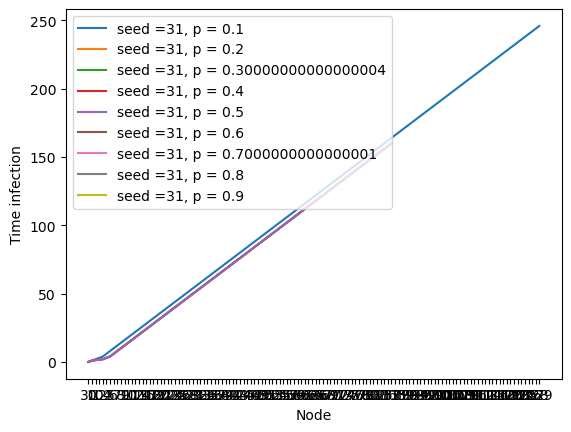

IndexError: index 169 is out of bounds for axis 0 with size 130

In [44]:
for seed in Nodes:
   
    seed_node = seed
    times_matrix = nx.adjacency_matrix(G, weight='weight').todense()
    shortest_paths = nx.shortest_path_length(G, source=seed_node, weight='weight')

    infect_array = infection_matrix(G)
    track_nodes = update_time(times_matrix, seed_node)
    for f in np.arange(0.1, 1.0, 0.1):

        
        infection_array = infection(f, track_nodes, prob_array, infect_array)
        times_array, track_array, accumulated_times  = update_time_prob(times_matrix, infection_array, seed_node)

        #
        acc_times = list(accumulated_times.values())
        
        if len(track_array > 1):
            
            x_values = track_array
            #print("x_values ", x_values)
            y_values = acc_times
            #print("y_values ", y_values)


            nodes, time = match_array_lengths(x_values, y_values)
            #print("nodes ", nodes)
            #print("time ", time)


            x_values_string = nodes.astype(str)



            # Plotting the line plot
            plt.plot(x_values_string, time, label='seed ={}, p = {}'.format(seed, f))
            
        else:
            pass

    # Adding labels to the axes
    plt.xlabel('Node')
    plt.ylabel('Time infection')

    # Adding a title to the plot
    #plt.title('Line Plot Example')

    # Adding a legend
    plt.legend()

    # Display the plot
    plt.show()


In [18]:
# Vuelta a PANDAS!
C_df = nx.to_pandas_edgelist(subnet)

In [20]:
C_df.head()

,source,target,Duration,StartTime
0,27,49,20280,1230074400
1,27,12,5460,1230084900
2,27,16,7200,1230084600
3,27,7,9900,1230069300
4,27,4,12840,1230069300


In [21]:
# Ok checking node 87?
C_df[C_df.source == 87]

#NOTHING THERE!

,source,target,Duration,StartTime


In [22]:
C_df.iloc[0:10,]

,source,target,Duration,StartTime
0,27,49,20280,1230074400
1,27,12,5460,1230084900
2,27,16,7200,1230084600
3,27,7,9900,1230069300
4,27,4,12840,1230069300
5,27,31,10680,1230068700
6,27,170,6960,1230078900
7,27,24,6000,1230086700
8,27,3,11400,1230068100
9,27,5,13440,1230044400


In [24]:
C_df.source.unique()

array([ 27,  49,  12,  16,   7,   4,  31,  24,   3,   5,  26,  34,  15,
        32,  25,  19,   8,  48,  28,  33, 109, 110,  10,  20,  29,  30,
        75,  47,   1,  50,  95,  65,  81,  46,  80,  83,  78,  82,  85,
        64,  77,  86,  94,  72, 108,   2])

In [26]:
C_dfs = C_df.sort_values(by=['StartTime'], ascending=True)

#C_dfs['real_time_start'] = C_dfs["StartTime"] - first.iloc[0, 2]
#C_dfs['real_time_end'] = C_dfs["real_time_start"] + C_dfs["Duration"]
#C_dfs27 = C_dfs[C_dfs.source == 27]

In [27]:
C_dfs.head()

,source,target,Duration,StartTime
50,27,87,13200,1229526300
134,49,45,4800,1229536800
222,2,118,3540,1229776380
223,2,264,12720,1229783700
198,94,2,6840,1229857500


In [31]:
## Start 27

In [33]:
C_dfs27

,source,target,Duration,StartTime,real_time_start,real_time_end
50,27,87,13200,1229526300,295200,308400
32,27,110,14400,1230042900,811800,826200
42,27,75,10440,1230043200,812100,822540
37,27,29,15300,1230044400,813300,828600
9,27,5,13440,1230044400,813300,826740
...,...,...,...,...,...,...
38,27,177,4500,1230085200,854100,858600
55,27,183,5040,1230085200,854100,859140
19,27,25,7080,1230085260,854160,861240
14,27,22,7500,1230085800,854700,862200


In [51]:
############################
# Infected nodes + times: OUTPUT1
############################
C_dfs27[['target', 'real_time_end']]

,target,real_time_end
50,87,308400
32,110,826200
42,75,822540
37,29,828600
9,5,826740
...,...,...
38,177,858600
55,183,859140
19,25,861240
14,22,862200


In [56]:
C_dfs27s = C_dfs27.sort_values(by='real_time_end')

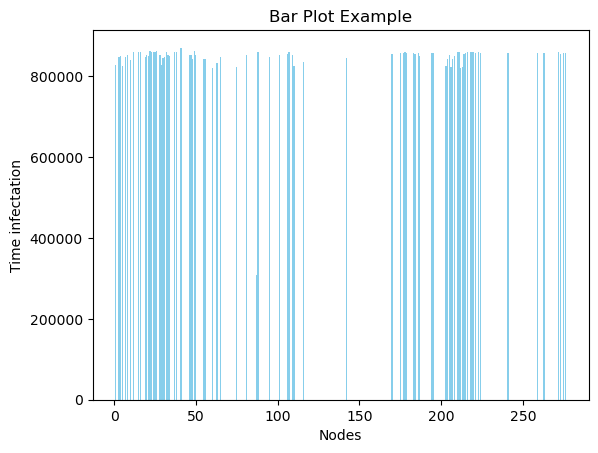

In [57]:
# Sample data
# Create a bar plot
plt.bar(C_dfs27s['target'], C_dfs27s['real_time_end'], color='skyblue')

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('Time infectation')
plt.title('Bar Plot Example')

# Display the plot
plt.show()

In [58]:
C_dfs27s # the second one is 87!!

,source,target,Duration,StartTime,real_time_start,real_time_end
50,27,87,13200,1229526300,295200,308400
81,27,60,4620,1230048120,817020,821640
82,27,212,4200,1230048900,817800,822000
42,27,75,10440,1230043200,812100,822540
86,27,206,4200,1230049500,818400,822600
...,...,...,...,...,...,...
7,27,24,6000,1230086700,855600,861600
13,27,26,8280,1230084660,853560,861840
14,27,22,7500,1230085800,854700,862200
0,27,49,20280,1230074400,843300,863580


## SECOND

In [69]:
Second = ev_seq[ev_seq["Source"] == 87]

In [70]:
Second

,Source,Destination,StartTime,EndTime,Duration,status_s,status_d
3259,87,4,1229245200,1229251260,6060,0.0,0.0
3298,87,31,1229245500,1229256000,10500,0.0,0.0
3263,87,4,1229246100,1229252100,6000,0.0,0.0
3272,87,3,1229246100,1229250600,4500,0.0,0.0
3280,87,81,1229247000,1229251500,4500,0.0,0.0
...,...,...,...,...,...,...,...
165049,87,48,1230070800,1230074040,3240,0.0,0.0
165043,87,47,1230072360,1230079500,7140,0.0,0.0
165029,87,21,1230073200,1230077700,4500,0.0,0.0
165018,87,10,1230076800,1230081000,4200,0.0,0.0


In [71]:
Second = Second.sort_values(by=['StartTime'], ascending=True)
Second['real_time_start'] = Second["StartTime"] - first.iloc[0, 2]
Second['real_time_end'] = Second["real_time_start"] + Second["Duration"]
#C_dfs27 = C_dfs[C_dfs.source == 27]

In [73]:
Second.Source.unique()

array([87])

In [74]:
############################
# Infected nodes + times: OUTPUT1
############################
Second[['Destination', 'real_time_end']]

,Destination,real_time_end
3259,4,20160
3298,31,24900
3263,4,21000
3272,3,19500
3280,81,20400
...,...,...
165049,48,842940
165043,47,848400
165029,21,846600
165018,10,849900


In [77]:
# Sample data
# Create a bar plot
plt.bar(C_dfs27s['target'], C_dfs27s['real_time_end'], color='skyblue')

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('Time infectation')
plt.title('Bar Plot Example')

# Display the plot
plt.show()

KeyError: 'another_column'

TypeError: get_edge_attributes() missing 1 required positional argument: 'name'

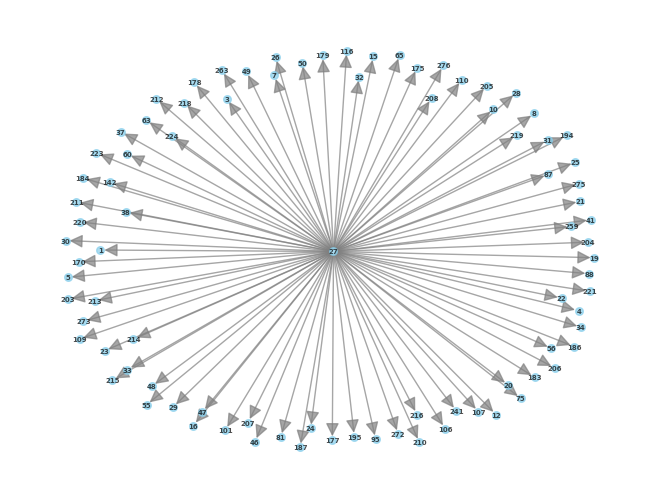

In [50]:


G = nx.from_pandas_edgelist(C_dfs27, 'source', 'target', ['real_time_end'], create_using=nx.DiGraph)


pos = nx.spring_layout(G)  # You can choose different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=30, node_color='skyblue', font_size=5, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7, arrowsize=20)

# Add edge weights to the plot
edge_labels = nx.get_edge_attributes(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.write_gexf(G, "subnet.gexf")


plt.title('NetworkX Graph from Pandas DataFrame')
plt.show()

real_time_end

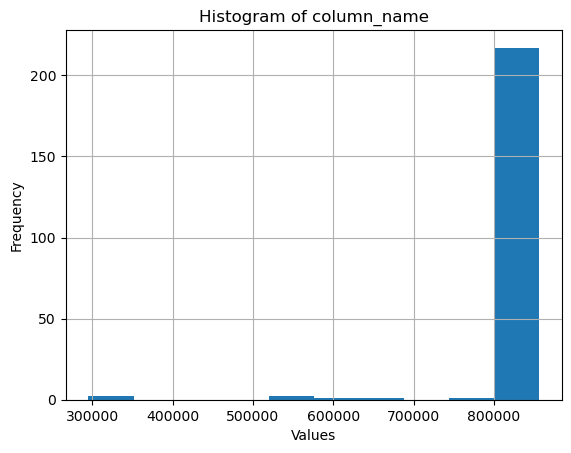

In [36]:
C_dfs['real_time_start'].hist(bins=10)  # Adjust the number of bins as needed
plt.title('Histogram of column_name')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

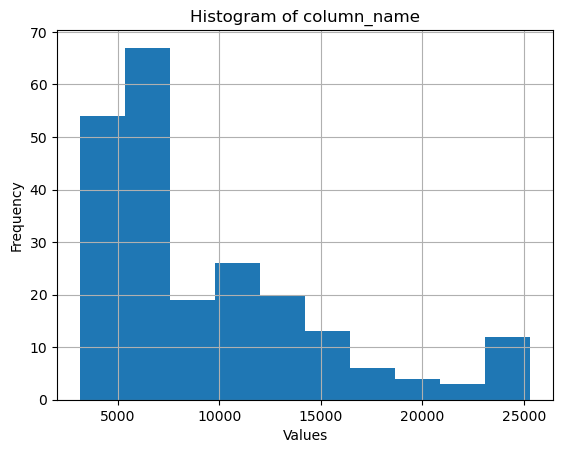

In [37]:
C_dfs['Duration'].hist(bins=10)  # Adjust the number of bins as needed
plt.title('Histogram of column_name')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [38]:
import networkx as nx

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 1)])

# Export the graph to GEXF format
#nx.write_gexf(G, "sample_graph.gexf")


https://tobywise.com/posts/python_parallel/

In [83]:
import time
from joblib import Parallel, delayed

def countdown(n):
    while n>0:
        n -= 1
    return n


t = time.time()
for _ in range(20):
    print(countdown(10**7), end=" ")
print(time.time() - t)  
# takes ~10.5 seconds on medium sized Macbook Pro


t = time.time()
results = Parallel(n_jobs=5)(delayed(countdown)(10**7) for _ in range(20))
print("parallel2", results)
print(time.time() - t)
# takes ~6.3 seconds on medium sized Macbook Pro

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6.482831001281738
parallel2 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.7782588005065918


In [84]:
from numba import njit

X = np.random.randn(500)
Y = np.random.randn(500)


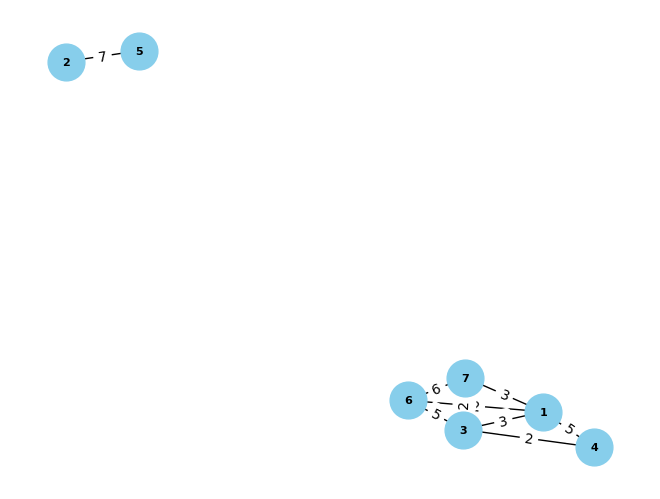

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a graph with 10 nodes
G = nx.Graph()

# Add nodes to the graph
nodes = 8
G.add_nodes_from(range(1, nodes))

# Add edges with random weights
for i in range(1, nodes - 1):
    for j in range(i + 1, nodes):
        # Add an edge with a random weight
        if random.choice([True, False]):
            weight = random.randint(1, nodes - 1)
            G.add_edge(i, j, weight=weight)

# Plot the graph with weights
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

# Add edge labels with weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()



In [28]:
'''
min_distances = dict(nx.all_pairs_dijkstra_path_length(G))

# Print the minimum distances
print("Minimum distances between each pair of nodes:")
for source in range(1, 11):
    for target in range(source + 1, nodes):
        print(f"({source}, {target}): {min_distances[source][target]}")
'''

'\nmin_distances = dict(nx.all_pairs_dijkstra_path_length(G))\n\n# Print the minimum distances\nprint("Minimum distances between each pair of nodes:")\nfor source in range(1, 11):\n    for target in range(source + 1, nodes):\n        print(f"({source}, {target}): {min_distances[source][target]}")\n'

In [34]:
weight_matrix = nx.adjacency_matrix(G, weight='weight').todense()

In [35]:
weight_matrix 

array([[0, 0, 0, 3, 4, 2, 6],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 6],
       [3, 3, 2, 0, 0, 0, 2],
       [4, 0, 0, 0, 0, 0, 4],
       [2, 0, 0, 0, 0, 0, 0],
       [6, 0, 6, 2, 4, 0, 0]])

In [31]:
import random

random_number = random.randint(1, 36)
print(random_number)


28


In [ ]:
# Get the array
times_array = create_time_matrix(G)
infect_array = infection_matrix(G)
#print("infect array", infect_array)

seed_node = 4
#print(times_array[(seed_node - 1),:])

values = 0
for _ in enumerate(G.nodes()):
    
    try:
        # check the times array
        # What was the min value of the arrange greater than 0 (it-self)--> faster transmittion
        min_value = np.min(times_array[(seed_node - 1), times_array[(seed_node - 1), :] > values])
        values = min_value

        
        # time to get to the shotest Nodses
        print("min time: ", min_value)
        print("pass 1")
        
        
        # Index
        # find the array of indeces in the array with minimum values Nodes. each time
        Nodes = np.where(times_array[(seed_node - 1), :] == min_value)[0]
        print("pass 2")
        # Print the result
        print(f"The minimum value is {min_value} at column index Node are {Nodes}")
        
        ##########################
        #Update the infection time
        ##########################
        p = 1

        iteration = 0
        print("times array 1", times_array)
        if p >= 1:
            #infect: maybe change later
            infect_array[seed_node - 1, Nodes] = 1
            print("infection:")
            print(infect_array)

            #update time of those neighbor Nodes:
            # excluding original (self)
            #now since we have Nodes:
            #    1. pick the line in times array
            #.   2.update the time addind the value
            update = times_array[Nodes, :] 
            update[update > 0] += min_value


            #add
            times_array[Nodes, :] = update

        iteration += 1

        print("times array 2", times_array)
        #break #<-------Remove
        
        
    except:
        break


In [1]:
import numpy as np

# Your matrix with 0s and 1s
binary_matrix = np.array([
    [0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 1],
    [1, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 0]
])

# Your probability values
probabilities = np.random.rand(7, 7)

# Create a new matrix with the specified probabilities
result_matrix = np.where(binary_matrix == 1, probabilities, 0)

print(result_matrix)

[[0.         0.12879971 0.         0.27408683 0.         0.
  0.41469652]
 [0.20047107 0.         0.66062953 0.         0.         0.04696666
  0.        ]
 [0.         0.784218   0.         0.29163935 0.8808419  0.
  0.8568054 ]
 [0.33832743 0.         0.14654999 0.         0.         0.70389817
  0.        ]
 [0.         0.         0.3407921  0.         0.         0.50562109
  0.97817321]
 [0.97978677 0.86297703 0.         0.74146998 0.         0.
  0.        ]
 [0.         0.         0.39947723 0.         0.97840604 0.17743667
  0.        ]]
